In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from functions import *

In [3]:
mc = pd.read_csv("marketing_customer_analysis.csv")

In [4]:
# As I good practice, I have considered importing the functions.py functions and pass the lowercase and space replacement function.
mc = lowercase_headers_and_replace_spaces(mc)
mc.dtypes

customer                          object
state                             object
customer_lifetime_value          float64
response                          object
coverage                          object
education                         object
effective_to_date                 object
employmentstatus                  object
gender                            object
income                             int64
location_code                     object
marital_status                    object
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
policy_type                       object
policy                            object
renew_offer_type                  object
sales_channel                     object
total_claim_amount               float64
vehicle_class                     object
vehicle_size                      object
dtype: object

In [5]:
# We check if any missing values are present in the columns
mc.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [6]:
# For the sake of calculating the correlation among columns, and remove outliers
#we will split the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals.
# Just visualization. We will then split them again at the right time.
mc_num=mc.select_dtypes(include = np.number)
display(mc_num.head())
print("Number of columns for numerical values {}".format(mc_num.shape[1]))
display(mc_num.columns)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


Number of columns for numerical values 8


Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total_claim_amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


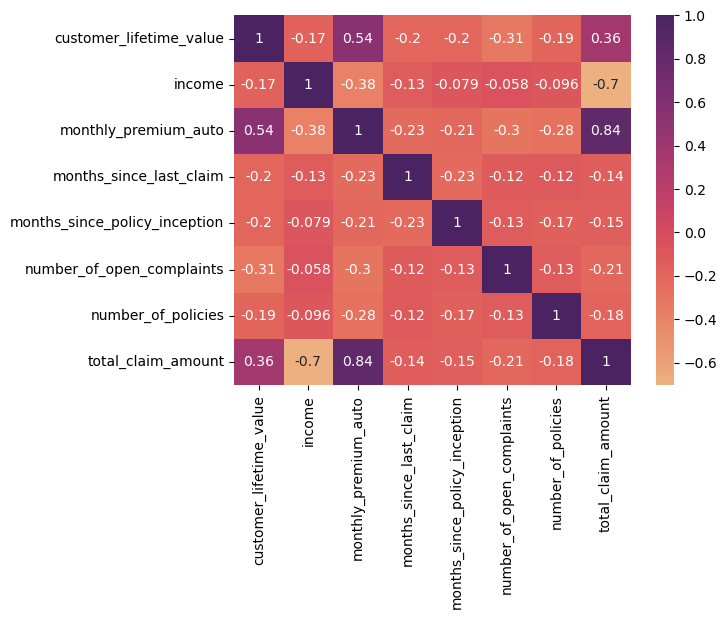

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
# We proceed to calculate the correlation among columns to then be able to split the columns and drop those that may havre multicollinearity or are not relevant 
mc_num_corr= mc_num.corr()
display(mc_num_corr)
#We plot it into a heatplot to have a better overview
correlations_matrix = mc_num_corr.corr()
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(correlations_matrix, annot=True, cmap=cmap) # annot = True displays the correlation values, annot=False hides the correlation values
plt.show()
# We describe the data below as well, to see the data ranges of the different columns.
display(mc_num.describe().T)

In [8]:
# As seen on the previous lab, there seems to be a high correlation with monthly_premium_auto and no multicollinearity among the rest of numerical values.

In [9]:
mc.shape

(9134, 24)

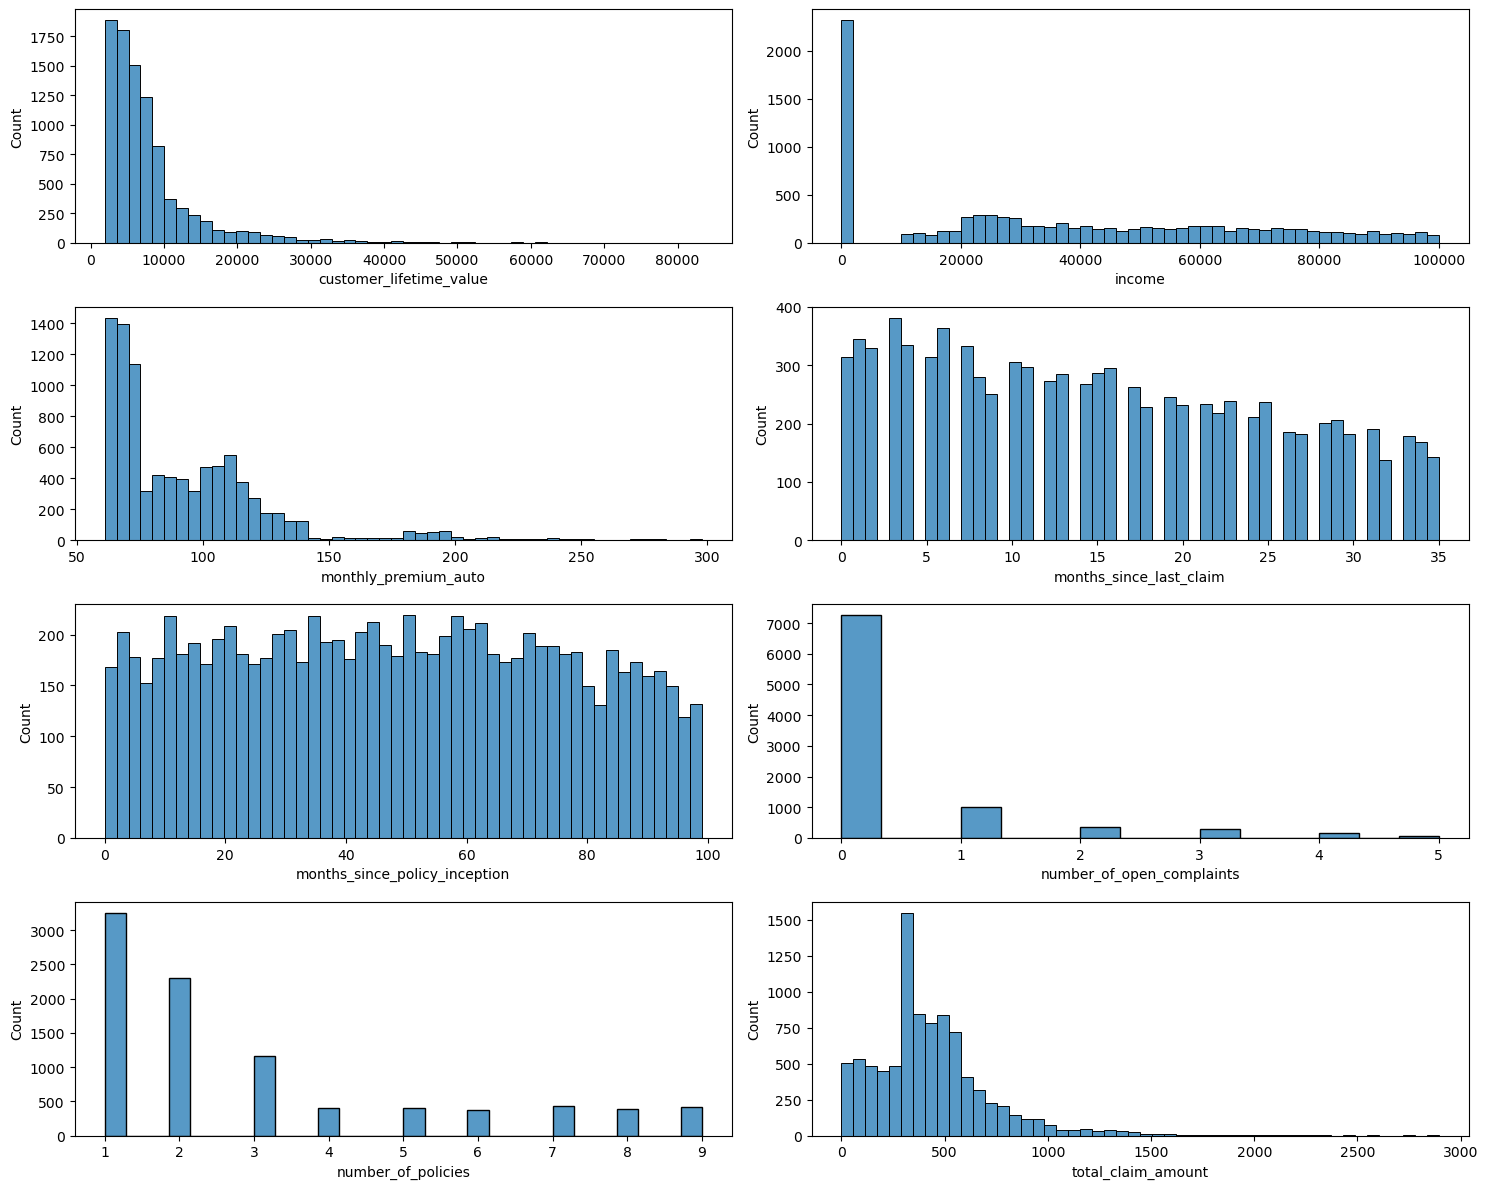

In [10]:
# We are going to plot the numerical columns to remove outliers:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(4, 2, figsize=(15, 12))

sns.histplot(mc['customer_lifetime_value'], bins=50, ax=ax[0, 0])
sns.histplot(mc['income'], bins=50, ax=ax[0, 1])
sns.histplot(mc['monthly_premium_auto'], bins=50, ax=ax[1, 0])
sns.histplot(mc['months_since_last_claim'], bins=50, ax=ax[1, 1])
sns.histplot(mc['months_since_policy_inception'], bins=50, ax=ax[2, 0])
sns.histplot(mc['number_of_open_complaints'], ax=ax[2, 1])
sns.histplot(mc['number_of_policies'], ax=ax[3, 0])
sns.histplot(mc['total_claim_amount'], bins=50, ax=ax[3, 1])

plt.tight_layout()
plt.show()



In [11]:
print("Skewness of customer_lifetime_value is: ", mc["customer_lifetime_value"].skew().round(2))
print("Skewness of income is: ", mc["income"].skew().round(2))
print("Skewness of monthly_premium_auto is: ", mc["monthly_premium_auto"].skew().round(2))
print("Skewness of months_since_last_claim is: ", mc["months_since_last_claim"].skew())
print("Skewness of months_since_policy_inception is: ", mc["months_since_policy_inception"].skew().round(2))
print("Skewness of number_of_open_complaints is: ", mc["number_of_open_complaints"].skew().round(2))
print("Skewness of number_of_policies is: ", mc["number_of_policies"].skew().round(2))
print("Skewness of total_claim_amount is: ", mc["total_claim_amount"].skew().round(2))

Skewness of customer_lifetime_value is:  3.03
Skewness of income is:  0.29
Skewness of monthly_premium_auto is:  2.12
Skewness of months_since_last_claim is:  0.2785863118107981
Skewness of months_since_policy_inception is:  0.04
Skewness of number_of_open_complaints is:  2.78
Skewness of number_of_policies is:  1.25
Skewness of total_claim_amount is:  1.71


In [12]:
#Removing outliers:
# Not having a deep knowledge of the business, I will only remove outliers from the columns monthly premium auto and customer lifetime value
# I thought about removing outliers from income, as we have many 0, but then I realized that those records correspond to unemployed people, which is relevant
# we will check the shape before and after removing outliers

In [13]:
display(mc.shape)

(9134, 24)

C:\Users\e.sansebastian\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


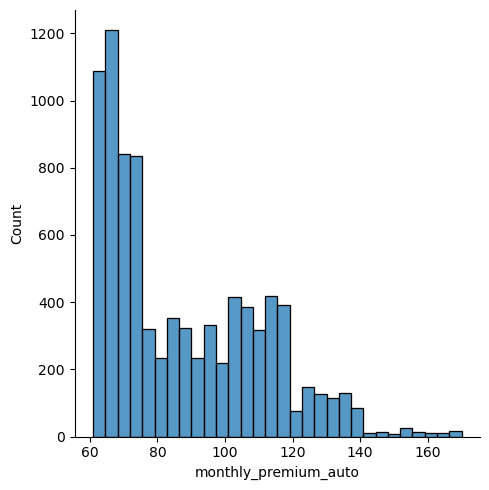

(8704, 24)

In [14]:
iqr = np.percentile(mc['monthly_premium_auto'],75) - np.percentile(mc['monthly_premium_auto'],25)
upper_wisker = np.percentile(mc['monthly_premium_auto'],75) + 1.5*iqr
lower_wisker = np.percentile(mc['monthly_premium_auto'],25) - 1.5*iqr
mc = mc[(mc['monthly_premium_auto']>lower_wisker) & (mc['monthly_premium_auto']<upper_wisker)]
sns.displot(mc['monthly_premium_auto'])
plt.show()
display(mc.shape)

In [15]:
#X-y split. (define which column you want to predict, and which ones you will use to make the prediction)
y = mc['total_claim_amount']
X = mc.drop(['total_claim_amount',"customer","effective_to_date"], axis=1)
display(X.columns)

Index(['state', 'customer_lifetime_value', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'income', 'location_code',
       'marital_status', 'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'policy_type', 'policy', 'renew_offer_type',
       'sales_channel', 'vehicle_class', 'vehicle_size'],
      dtype='object')

In [16]:
# We proceed with the Train-test splie

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mc, y, test_size=0.2, random_state=42)

In [17]:
# Keep in mind that X_train, X_test and X_new have the same amount of columns.
# We can use this information when we create the Pandas DataFrame.
X_train_df = pd.DataFrame(X_train, columns = X.columns)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns)

In [25]:
#categorical features and numerical ones are going to be treated differently
# We split numerical and categorical columns:
X_train_num = X_train_df.select_dtypes(include = np.number)
X_test_num = X_test_df.select_dtypes(include = np.number)

In [26]:
X_train_categorical = X_train_df.select_dtypes('object')
X_test_categorical  = X_test_df.select_dtypes('object')

In [34]:
X_train_categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
2072,California,No,Basic,College,Employed,F,Rural,Married,Corporate Auto,Corporate L1,Offer2,Agent,Two-Door Car,Medsize
2900,Oregon,No,Extended,High School or Below,Employed,M,Urban,Married,Personal Auto,Personal L3,Offer2,Web,SUV,Medsize
1302,Washington,No,Basic,Master,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer2,Call Center,Two-Door Car,Medsize
5520,Arizona,No,Basic,Bachelor,Unemployed,M,Urban,Married,Personal Auto,Personal L2,Offer2,Call Center,Four-Door Car,Medsize
6492,Oregon,No,Basic,High School or Below,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Medsize


In [78]:
# I see that some of the columns, such as education, vehicle size and coverage (and maybe some others) are cardinals.
# I would drop them from the categorial df and encode them separately, but I don´t see myself with the skills to process it.

In [29]:
import pickle
import os
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_num) # fit() Determine the min and the max of each column in the TRAIN set

path = "./"

isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

scaler_file_name = "standard_scaler.pkl"


with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_standard = scaler.transform(X_train_num)
X_test_standard  = scaler.transform(X_test_num)

X_train_std = pd.DataFrame(X_train_standard, columns=X_train_num.columns, index= X_train_num.index)
X_test_std  = pd.DataFrame(X_test_standard, columns=X_test_num.columns, index= X_test_num.index)

display(X_test_std)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
3181,2.490641,-1.232998,0.756185,0.096658,-1.136481,-0.424550,-0.405048
2283,0.449000,-0.312878,0.145506,1.687282,-1.565770,-0.424550,-0.405048
5878,0.807979,-0.372198,3.024420,-1.295137,-1.100706,-0.424550,1.682245
1393,-0.276203,0.544564,-0.421553,-0.996895,-0.349449,5.001558,2.099704
5797,-0.760781,1.373828,-0.726892,-0.400411,1.117291,-0.424550,-0.822507
...,...,...,...,...,...,...,...
3152,0.256723,-1.232998,2.108402,-0.201583,-0.707191,-0.424550,0.429869
6132,-0.397885,-0.345764,-0.508792,-1.394551,-1.708867,0.660671,2.099704
2046,0.477919,-0.568725,1.977542,1.389040,-1.708867,0.660671,0.847328
5168,1.202525,-0.294377,0.538085,-1.096309,-0.921836,0.660671,-0.405048


In [32]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')
encoder.fit(X_train_categorical)

path = "./"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
  print("The new directory is created!")

filename = "econder_model.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
   pickle.dump(encoder, file) # Replace "variable" with the name of the variable that contains your transformer

X_train_cat_np = encoder.transform(X_train_categorical).toarray()
X_test_cat_np  = encoder.transform(X_test_categorical).toarray()

display(X_train_cat_np)

X_train_cat = pd.DataFrame(X_train_cat_np, columns=encoder.get_feature_names_out(), 
                           index=X_train_categorical.index)
X_test_cat  = pd.DataFrame(X_test_cat_np,  columns=encoder.get_feature_names_out(),
                          index=X_test_categorical.index)
display(X_train_cat)

array([[1., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2072,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2900,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1302,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6492,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6024,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5453,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5664,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
896,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [35]:
X_train_transformed = pd.concat([X_train_std, X_train_cat], axis=1)
X_test_transformed = pd.concat([X_test_std, X_test_cat], axis=1)
X_train_transformed.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
2072,-0.807764,1.524235,-1.032231,1.190212,-0.492546,-0.424550,-0.822507,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2900,0.429757,0.900979,1.803063,-1.394551,1.081517,-0.424550,0.429869,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1302,-0.327063,0.832309,-0.770512,1.389040,1.153065,-0.424550,0.012410,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
5520,-0.390509,-1.232998,-0.639652,1.190212,1.689678,0.660671,1.264786,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6492,-0.829763,-1.232998,-0.857752,1.985523,0.151389,-0.424550,-0.822507,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [75]:
import pickle
import os
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train_transformed) # fit() Determine the min and the max of each column in the TRAIN set

path = "./"

isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

scaler_file_name = "minmax_scaler.pkl"


with open(path + scaler_file_name, "wb") as file:
    pickle.dump(scaler, file)

X_train_minmax = scaler.transform(X_train_transformed)
X_test_minmax  = scaler.transform(X_test_transformed)

X_train_scaled = pd.DataFrame(X_train_minmax, columns=X_train_transformed.columns, index= X_train_transformed.index)
X_test_scaled  = pd.DataFrame(X_test_minmax, columns=X_test_transformed.columns, index= X_test_transformed.index)

display(X_test_scaled)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,state_California,state_Nevada,state_Oregon,...,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
3181,0.381934,0.000000,0.403670,0.457143,0.161616,0.0,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2283,0.153181,0.279619,0.275229,0.914286,0.040404,0.0,0.125,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5878,0.193402,0.261592,0.880734,0.057143,0.171717,0.0,0.750,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1393,0.071926,0.540191,0.155963,0.142857,0.383838,1.0,0.875,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5797,0.017632,0.792199,0.091743,0.314286,0.797980,0.0,0.000,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3152,0.131637,0.000000,0.688073,0.371429,0.282828,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6132,0.058293,0.269625,0.137615,0.028571,0.000000,0.2,0.875,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2046,0.156421,0.201869,0.660550,0.828571,0.000000,0.2,0.500,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5168,0.237609,0.285241,0.357798,0.114286,0.222222,0.2,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [55]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train) # If we has to transform y_train, we will use .fit(X_train_scaled_df, y_train_transformed)

path = "./"
    # Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
      # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

model_name = "lm_model_1.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+model_name, "wb") as file:
    pickle.dump(linear_model, file) # Replace "variable" with the name of the variable that contains your transformer

In [56]:
#We proceed to predict:

# From this point on I had to replicate the steps shown later weeks during the lessons, not understanding to 100% the whole content.

y_train_pred = linear_model.predict(X_train_scaled)
y_test_pred  = linear_model.predict(X_test_scaled)

In [76]:
results = {"Set": ["Train"]*X_train_scaled.shape[0] + ["Test"]*X_test_scaled.shape[0],
           "Real": list(y_train) + list(y_test),
           "Predicted": list(y_train_pred) + list(y_test_pred)}

results_df = pd.DataFrame(results)
results_df.head()

,Set,Real,Predicted
0,Train,106.591949,-31.498113
1,Train,359.484342,523.884860
2,Train,239.328571,229.141187
3,Train,194.944319,331.299817
4,Train,489.600000,524.977921


In [77]:
results_df['Errors'] = results_df['Real'] - results_df['Predicted']
results_df.head()

,Set,Real,Predicted,Errors
0,Train,106.591949,-31.498113,138.090062
1,Train,359.484342,523.884860,-164.400518
2,Train,239.328571,229.141187,10.187384
3,Train,194.944319,331.299817,-136.355498
4,Train,489.600000,524.977921,-35.377921


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean absolute error
MAE_train = mean_absolute_error(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
MAE_test  = mean_absolute_error(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])

# Mean squared error
MSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
MSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])

# Root mean squared error
RMSE_train = mean_squared_error(results_df[results_df["Set"]=="Train"]["Real"],
                                results_df[results_df["Set"]=="Train"]["Predicted"],
                                squared=False)
RMSE_test  = mean_squared_error(results_df[results_df["Set"]=="Test"]["Real"],
                                results_df[results_df["Set"]=="Test"]["Predicted"],
                                squared=False)

# R2
R2_train = r2_score(results_df[results_df["Set"]=="Train"]["Real"], results_df[results_df["Set"]=="Train"]["Predicted"])
R2_test   = r2_score(results_df[results_df["Set"]=="Test"]["Real"],  results_df[results_df["Set"]=="Test"]["Predicted"])

In [73]:
def error_metrics_report(y_real_train: list, y_real_test: list, y_pred_train: list, y_pred_test: list) -> pd.DataFrame:
    '''
    This function takes the real values and any model predictions for the Train and Test sets and returns a Pandas
    DataFrame with a summary of error metrics for the Train and Test sets like this:

    | Metric | Train | Test |
    |--------|-------|------|
    | MAE    | value | value|
    | MSE    | value | value|
    | RMSE   | value | value|
    | R2     | value | value|

    Inputs:
    y_real_train: Python list with the real values to be predicted in the Train set
    y_real_train: Python list with the real values to be predicted in the Train set
    y_pred_train: Python list with the model's predicted values in the Train set
    y_pred_test:  Python list with the model's predicted values in the Train set
    '''

    MAE_train = mean_absolute_error(y_real_train, y_pred_train)
    MAE_test  = mean_absolute_error(y_real_test, y_pred_test)

    # Mean squared error
    MSE_train = mean_squared_error(y_real_train, y_pred_train)
    MSE_test  = mean_squared_error(y_real_test, y_pred_test)

    # Root mean squared error
    RMSE_train = mean_squared_error(y_real_train, y_pred_train, squared=False)
    RMSE_test  = mean_squared_error(y_real_test,  y_pred_test,  squared=False)

    # R2
    R2_train = r2_score(y_real_train, y_pred_train)
    R2_test  = r2_score(y_real_test,  y_pred_test)

    results = {"Metric": ["MAE","MSE", "RMSE", "R2"],
               "Train": [MAE_train, MSE_train, RMSE_train, R2_train],
               "Test":  [MAE_test, MSE_test, RMSE_test, R2_test]}

    results_df = pd.DataFrame(results).round(2)

    return results_df

In [74]:
error_metrics_report(list(results_df[results_df["Set"]=="Train"]["Real"]),
                     list(results_df[results_df["Set"]=="Test"]["Real"]),
                     list(results_df[results_df["Set"]=="Train"]["Predicted"]),
                     list(results_df[results_df["Set"]=="Test"]["Predicted"]))

,Metric,Train,Test
0,MAE,84.87,85.32
1,MSE,13983.63,14379.82
2,RMSE,118.25,119.92
3,R2,0.75,0.75
